# Question 3: III. How do offered salaries compare to the prevailing wage?
> 	Are there job sub-categories that tend to get over-paid or under-paid?
> 	Are there companies that tend to over-pay or under-pay?
> 	Will the answer change if I take standard of living into account?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#As we're working with salaries here, decided to limit numbers to 2 decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
salary_df = pd.read_excel('salary_data_states.xlsx')

In [3]:
salary_df.columns

Index(['CASE_NUMBER', 'CASE_STATUS', 'CASE_RECEIVED_DATE', 'DECISION_DATE',
       'EMPLOYER_NAME', 'PREVAILING_WAGE_SUBMITTED',
       'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED',
       'PAID_WAGE_SUBMITTED_UNIT', 'JOB_TITLE', 'WORK_CITY',
       'EDUCATION_LEVEL_REQUIRED', 'COLLEGE_MAJOR_REQUIRED',
       'EXPERIENCE_REQUIRED_Y_N', 'EXPERIENCE_REQUIRED_NUM_MONTHS',
       'COUNTRY_OF_CITIZENSHIP', 'PREVAILING_WAGE_SOC_CODE',
       'PREVAILING_WAGE_SOC_TITLE', 'WORK_STATE', 'WORK_STATE_ABBREVIATION',
       'WORK_POSTAL_CODE', 'FULL_TIME_POSITION_Y_N', 'VISA_CLASS',
       'PREVAILING_WAGE_PER_YEAR', 'PAID_WAGE_PER_YEAR', 'JOB_TITLE_SUBGROUP',
       'order'],
      dtype='object')

Now that we've got an idea what our columns are, let's check for empty values:

In [4]:
salary_df.isna().sum()

CASE_NUMBER                            0
CASE_STATUS                            0
CASE_RECEIVED_DATE                     0
DECISION_DATE                          0
EMPLOYER_NAME                          0
PREVAILING_WAGE_SUBMITTED              0
PREVAILING_WAGE_SUBMITTED_UNIT         0
PAID_WAGE_SUBMITTED                    0
PAID_WAGE_SUBMITTED_UNIT               0
JOB_TITLE                              0
WORK_CITY                              3
EDUCATION_LEVEL_REQUIRED          156185
COLLEGE_MAJOR_REQUIRED            156227
EXPERIENCE_REQUIRED_Y_N           156185
EXPERIENCE_REQUIRED_NUM_MONTHS    162313
COUNTRY_OF_CITIZENSHIP            156185
PREVAILING_WAGE_SOC_CODE               0
PREVAILING_WAGE_SOC_TITLE              0
WORK_STATE                             0
WORK_STATE_ABBREVIATION                0
WORK_POSTAL_CODE                  113604
FULL_TIME_POSITION_Y_N             11093
VISA_CLASS                             0
PREVAILING_WAGE_PER_YEAR              68
PAID_WAGE_PER_YE

For the first part of the question, useful columns would be JOB_TITLE_SUBGROUP, JOB_TITLE, and the difference between PREVAILING_WAGE_SUBMITTED and PAID_WAGE_SUBMITTED. Prevailing wage is the expected wage for a position, while the paid wage it what is actually offered and accepted after negotiations. Job title subgroup contains broader terms (such as business analyst), which we will be restricting to business analyst, data analyst, data scientist, management consultant, software engineer.

In [5]:
salary_df['JOB_TITLE_SUBGROUP'].value_counts()

software engineer        99364
business analyst         27811
assistant professor      18866
teacher                  13912
data analyst              3840
attorney                  1488
data scientist            1227
management consultant      770
Name: JOB_TITLE_SUBGROUP, dtype: int64

Now, let's begin by answering part 1:
## Are there job sub-categories that tend to get over-paid or under-paid?

Let's filter our data set exlucisively by the columns that interest us when answering this question.

In [6]:
#filtering the salary df by relevant categories
jobs_df = salary_df.filter(['JOB_TITLE_SUBGROUP', 'JOB_TITLE', 'PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED'])

Now that we have filtered our data set, it is time to do some actual analysis! We will further restrict our data set by limiting it to software-related jobs.

In [7]:
#These are the only jobs we are interested in
options = ['software engineer', 'business analyst', 'data analyst', 'data scientist', 'management consultant']

#filtering by certain jobs in job title subgroup
jdf = jobs_df[jobs_df['JOB_TITLE_SUBGROUP'].isin(options)]

print(jdf)

       JOB_TITLE_SUBGROUP                            JOB_TITLE  \
0       software engineer                    SOFTWARE ENGINEER   
4       software engineer             SENIOR SOFTWARE ENGINEER   
5        business analyst  ORACLE SCM ANALYST/BUSINESS ANALYST   
6       software engineer             SENIOR SOFTWARE ENGINEER   
7       software engineer                    SOFTWARE ENGINEER   
...                   ...                                  ...   
167015  software engineer           SOFTWARE ENGINEER & TESTER   
167052   business analyst                     BUSINESS ANALYST   
167053   business analyst                     BUSINESS ANALYST   
167115       data analyst                         DATA ANALYST   
167233   business analyst          ENTERPRISE BUSINESS ANALYST   

        PREVAILING_WAGE_SUBMITTED  PAID_WAGE_SUBMITTED  
0                      6217100.00             62171.00  
4                        84573.00            170000.00  
5                       113610.00   

We must also check for any empty rows, as these will mess with our analysis.

In [8]:
#check for empty values
jdf.isna().sum()

JOB_TITLE_SUBGROUP           0
JOB_TITLE                    0
PREVAILING_WAGE_SUBMITTED    0
PAID_WAGE_SUBMITTED          0
dtype: int64

In [9]:
#get an idea on the actual values
jdf.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED
count,133012.00,133012.00
mean,76659.65,84230.42
std,33625.90,33568.01
min,8.00,10.00
25%,60611.00,65000.00
50%,74651.00,80000.00
75%,93662.00,102486.04
max,6217100.00,1400000.00


There are clearly some outliers here in salary, so lets figure out what they are. Although the IQR is depicted above, we should write code that will calculate it instead of copy-pasting.

Let's find the lower and upper fences of the IQR for the prevailing wage submitted:

In [10]:
def iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - (1.5 * IQR)
    Upper_Fence = Q3 + (1.5 * IQR)
    return (Lower_Fence, Upper_Fence)

In [11]:
(Lower_Fence_a, Upper_Fence_a) = iqr(jdf, 'PREVAILING_WAGE_SUBMITTED')

print(Lower_Fence_a, Upper_Fence_a)

11034.5 143238.5


And now, the same more the paid wage submitted:

In [12]:
(Lower_Fence_b, Upper_Fence_b) = iqr(jdf, 'PAID_WAGE_SUBMITTED')

print(Lower_Fence_b, Upper_Fence_b)

8770.947499999995 158715.08750000002


Although the above code is pretty ugly, **both results are not the same, WHY We can use those fences to exclude any outliers. Time to filter more and make a graph:**

<AxesSubplot:>

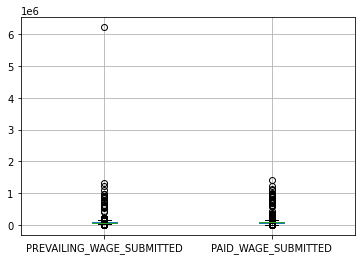

In [13]:
#current data with outliers graph
jdf.boxplot(column = ['PREVAILING_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED'])

The above graph shows how important utilizing the IQR fences to limit the data set. The outliers skew everything!

In [14]:
fdf = jdf[(jdf['PREVAILING_WAGE_SUBMITTED'] >= Lower_Fence_a) &
        (jdf['PREVAILING_WAGE_SUBMITTED'] <= Upper_Fence_a) &
        (jdf['PAID_WAGE_SUBMITTED'] >= Lower_Fence_b) &
        (jdf['PAID_WAGE_SUBMITTED'] <= Upper_Fence_b)]
print(fdf)

       JOB_TITLE_SUBGROUP                            JOB_TITLE  \
5        business analyst  ORACLE SCM ANALYST/BUSINESS ANALYST   
7       software engineer                    SOFTWARE ENGINEER   
9       software engineer                    SOFTWARE ENGINEER   
10      software engineer                SR. SOFTWARE ENGINEER   
12      software engineer                    SOFTWARE ENGINEER   
...                   ...                                  ...   
167012       data analyst                         DATA ANALYST   
167013   business analyst                     BUSINESS ANALYST   
167014  software engineer           SOFTWARE ENGINEER & TESTER   
167015  software engineer           SOFTWARE ENGINEER & TESTER   
167115       data analyst                         DATA ANALYST   

        PREVAILING_WAGE_SUBMITTED  PAID_WAGE_SUBMITTED  
5                       113610.00            114421.00  
7                       104458.00            104458.00  
9                        98675.00   

In [15]:
fdf.isna().sum()

JOB_TITLE_SUBGROUP           0
JOB_TITLE                    0
PREVAILING_WAGE_SUBMITTED    0
PAID_WAGE_SUBMITTED          0
dtype: int64

Checked briefly if our limiting as made some blank spots, and thankfully that's not the case!

<AxesSubplot:title={'center':'Comparing Prevailing and Paid Wage Averages'}, ylabel='Salary'>

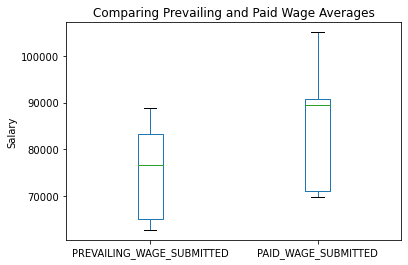

In [16]:
fdf.groupby('JOB_TITLE_SUBGROUP').mean().plot(kind = "box",
                                             title="Comparing Prevailing and Paid Wage Averages",
                                             ylabel="Salary")

Here, the prevailing wages and submitted wages are much more legible. Some degree of outliers still exist beyond the borders, but I can't figure out why.

Nevertheless, let's try ploting the difference in salaries for software engineers as an example.

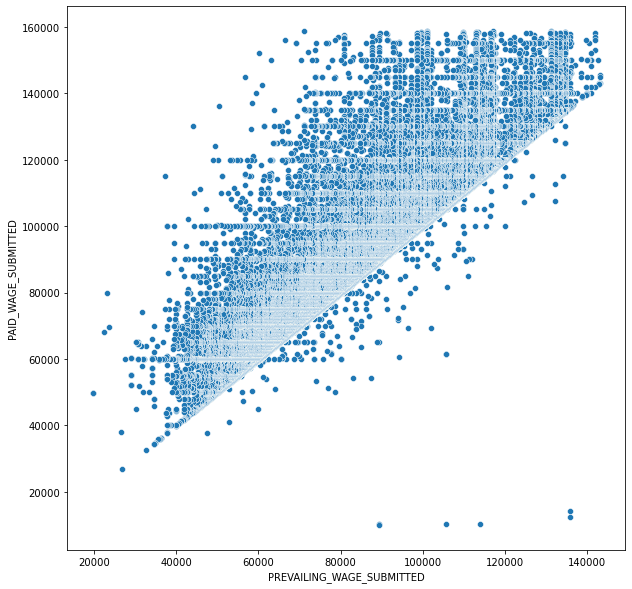

In [17]:
software = fdf[fdf['JOB_TITLE_SUBGROUP'] == 'software engineer']

fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(data=software,
               x=software['PREVAILING_WAGE_SUBMITTED'],
               y=software['PAID_WAGE_SUBMITTED'],
               ax=ax);



How horrible! Scatterplots are clearly not the solution for large data sets like this. 

<AxesSubplot:xlabel='PREVAILING_WAGE_SUBMITTED'>

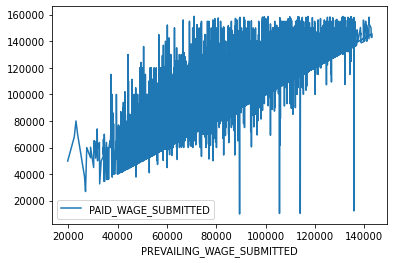

In [18]:
software.plot(x='PREVAILING_WAGE_SUBMITTED', y='PAID_WAGE_SUBMITTED')

This is also awful! Clearly, we need to make our data set a lot smaller. Let's take some averages:

In [19]:
fdf.groupby('JOB_TITLE_SUBGROUP').mean()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED
JOB_TITLE_SUBGROUP,,
business analyst,64920.45,70961.79
data analyst,62655.72,69701.84
data scientist,88830.80,105069.74
management consultant,76640.35,89376.98
software engineer,83309.01,90835.70


In [20]:
fdf['JOB_TITLE_SUBGROUP'].value_counts()

software engineer        94487
business analyst         25276
data analyst              3645
data scientist            1162
management consultant      445
Name: JOB_TITLE_SUBGROUP, dtype: int64

Here, we have some actual data! Average salary for what the business submited as expected compensation for the role, and then the average of actual salary accepted by the candidates. But this is just numbers - graphs are better:

<AxesSubplot:title={'center':'Prevailing Wage Vs Paid Wage by Job Group'}, xlabel='Job Group', ylabel='Salary'>

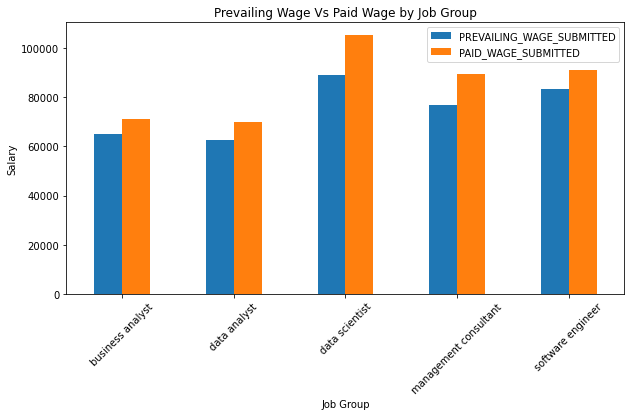

In [21]:
fdf.groupby('JOB_TITLE_SUBGROUP').mean().plot(kind = "bar",
                                             title="Prevailing Wage Vs Paid Wage by Job Group",
                                             xlabel="Job Group",
                                             ylabel="Salary",
                                             figsize=(10,5),
                                             rot=(45))

I feel this graph really makes it clear you should always negotiate for a higher salary - around 7k seems to be about the average, but data scientists really knock it out of the park. Their negotioations are the most succesful, with an average increase of ~15k, which is more than double. 

So to answer the first question: **From the jobs selected, Data Scientists are overpaid compared to other software jobs.**

## Are there companies that tend to over-pay or under-pay?

First, we need to make another data frame for this question, as we previously removed some columns.

In [22]:
#filtering the salary df by relevant categories
comp_df = salary_df.filter(['JOB_TITLE_SUBGROUP', 'JOB_TITLE', 'PAID_WAGE_SUBMITTED', 'EMPLOYER_NAME'])

#Previously, we used this to filter for the only jobs we are interested in
#options = ['software engineer', 'business analyst', 'data analyst', 'data scientist', 'management consultant']

#filtering by certain jobs in job title subgroup
comp_df = comp_df[comp_df['JOB_TITLE_SUBGROUP'].isin(options)]

print(comp_df)

       JOB_TITLE_SUBGROUP                            JOB_TITLE  \
0       software engineer                    SOFTWARE ENGINEER   
4       software engineer             SENIOR SOFTWARE ENGINEER   
5        business analyst  ORACLE SCM ANALYST/BUSINESS ANALYST   
6       software engineer             SENIOR SOFTWARE ENGINEER   
7       software engineer                    SOFTWARE ENGINEER   
...                   ...                                  ...   
167015  software engineer           SOFTWARE ENGINEER & TESTER   
167052   business analyst                     BUSINESS ANALYST   
167053   business analyst                     BUSINESS ANALYST   
167115       data analyst                         DATA ANALYST   
167233   business analyst          ENTERPRISE BUSINESS ANALYST   

        PAID_WAGE_SUBMITTED                           EMPLOYER_NAME  
0                  62171.00     ADVANCED TECHNOLOGY GROUP USA, INC.  
4                 170000.00             SIGNAL SCIENCES CORPORATION

In [23]:
comp_df.head()

,JOB_TITLE_SUBGROUP,JOB_TITLE,PAID_WAGE_SUBMITTED,EMPLOYER_NAME
0,software engineer,SOFTWARE ENGINEER,62171.00,"ADVANCED TECHNOLOGY GROUP USA, INC."
4,software engineer,SENIOR SOFTWARE ENGINEER,170000.00,SIGNAL SCIENCES CORPORATION
5,business analyst,ORACLE SCM ANALYST/BUSINESS ANALYST,114421.00,CAPGEMINI U.S. LLC
6,software engineer,SENIOR SOFTWARE ENGINEER,145000.00,"PURE STORAGE, INC."
7,software engineer,SOFTWARE ENGINEER,104458.00,"POLMAK, INC."


This looks good! JOB_TITLE is probably not strictly speaking necessary, but I'm interested in seeing the highest paid job later on.

Now, let's check for empty values:

In [24]:
comp_df.isna().sum()

JOB_TITLE_SUBGROUP     0
JOB_TITLE              0
PAID_WAGE_SUBMITTED    0
EMPLOYER_NAME          0
dtype: int64

Looking good! Very clean data set so far. Let's take a closer look at the companies:

In [25]:
#Adding a column that lists how many employees work for a certain employer
comp_df['NUM_EMPLOYEES'] = comp_df['EMPLOYER_NAME'].map(comp_df['EMPLOYER_NAME'].value_counts())

In [26]:
comp_df['EMPLOYER_NAME'].value_counts()

GOOGLE INC.                    6213
FUJITSU AMERICA, INC.          1814
INTEL CORPORATION              1779
MICROSOFT CORPORATION          1354
QUALCOMM TECHNOLOGIES, INC.    1277
                               ... 
AJACE INC                         1
MACROSYS, LLC                     1
TRIPLE POINT TECHNOLOGY           1
3DM PAYROLL INC.                  1
HEWITT ASSOCIATES, LLC            1
Name: EMPLOYER_NAME, Length: 18122, dtype: int64

Google employs a lot of people! Unsurprising. There are a lot of companies only employing one person, so I will remove them, as these likely contain outliers - for instance, an LLC owned and employing one person as a consulting software engineer might make a huge amount of money (because their business is doing well), but this doesn't count as overpaying an employee, as their income is so variable. Alternatively, a more traditional company may only provide one software job, and so that persons salary is more related to the salaries that that company happens to provide rather than how the job itself may or may not be commesurate with market rate.

Instead, we will restrict our results to companies employing over 120 people, somewhat arbitrarily. We will also removed an outlier salaries using the same IQR fence method as above.

In [27]:
comp_df.describe()

,PAID_WAGE_SUBMITTED,NUM_EMPLOYEES
count,133012.00,133012.00
mean,84230.42,493.74
std,33568.01,1323.84
min,10.00,1.00
25%,65000.00,8.00
50%,80000.00,46.00
75%,102486.04,243.00
max,1400000.00,6213.00


In [28]:
(Low_Fence, Up_Fence) = iqr(comp_df, 'PAID_WAGE_SUBMITTED')

print(Up_Fence, Low_Fence)

158715.08750000002 8770.947499999995


In [29]:
comp_df.head()

,JOB_TITLE_SUBGROUP,JOB_TITLE,PAID_WAGE_SUBMITTED,EMPLOYER_NAME,NUM_EMPLOYEES
0,software engineer,SOFTWARE ENGINEER,62171.00,"ADVANCED TECHNOLOGY GROUP USA, INC.",5
4,software engineer,SENIOR SOFTWARE ENGINEER,170000.00,SIGNAL SCIENCES CORPORATION,2
5,business analyst,ORACLE SCM ANALYST/BUSINESS ANALYST,114421.00,CAPGEMINI U.S. LLC,75
6,software engineer,SENIOR SOFTWARE ENGINEER,145000.00,"PURE STORAGE, INC.",50
7,software engineer,SOFTWARE ENGINEER,104458.00,"POLMAK, INC.",5


In [37]:
comp_fdf = comp_df[(comp_df['NUM_EMPLOYEES'] >= 100) & 
                   (comp_df['PAID_WAGE_SUBMITTED'] >= Low_Fence) & 
                   (comp_df['PAID_WAGE_SUBMITTED'] <= Up_Fence)]
print(comp_fdf)

       JOB_TITLE_SUBGROUP                   JOB_TITLE  PAID_WAGE_SUBMITTED  \
12      software engineer           SOFTWARE ENGINEER             90460.00   
13      software engineer           SOFTWARE ENGINEER             82846.00   
14      software engineer           SOFTWARE ENGINEER            105000.00   
17      software engineer    SENIOR SOFTWARE ENGINEER             92352.00   
24      software engineer           SOFTWARE ENGINEER            100000.00   
...                   ...                         ...                  ...   
166550  software engineer           SOFTWARE ENGINEER             69680.00   
166719   business analyst            BUSINESS ANALYST             62676.00   
166738   business analyst            BUSINESS ANALYST             63336.00   
167014  software engineer  SOFTWARE ENGINEER & TESTER             49800.00   
167015  software engineer  SOFTWARE ENGINEER & TESTER             49800.00   

                           EMPLOYER_NAME  NUM_EMPLOYEES  
12   

In [38]:
comp_fdf['EMPLOYER_NAME'].value_counts()

GOOGLE INC.                               5681
FUJITSU AMERICA, INC.                     1813
INTEL CORPORATION                         1777
MICROSOFT CORPORATION                     1323
QUALCOMM TECHNOLOGIES, INC.               1276
                                          ... 
ALINDUS, INC.                               44
MCKINSEY & COMPANY, INC. UNITED STATES      27
MNCL, INC.                                  24
SAGARSOFT, INC                              17
PEGASUS INFOTECH, INC.                      15
Name: EMPLOYER_NAME, Length: 160, dtype: int64

**ZERO CLUE WHY DESCRIBE() AND VALUE_COUNTS() DON'T MATCH**

In [41]:
comp_fdf.describe()

,PAID_WAGE_SUBMITTED,NUM_EMPLOYEES
count,48129.00,48129.00
mean,91613.70,1241.91
std,25153.24,1880.80
min,33571.00,101.00
25%,70000.00,202.00
50%,88275.00,453.00
75%,110000.00,1210.00
max,158700.00,6213.00


In [42]:
table = pd.pivot_table(comp_fdf, values=['PAID_WAGE_SUBMITTED'], index=['EMPLOYER_NAME'],
                      columns=['JOB_TITLE_SUBGROUP'], aggfunc=np.mean)
table

PAID_WAGE_SUBMITTED                              \
JOB_TITLE_SUBGROUP               business analyst data analyst data scientist   
EMPLOYER_NAME                                                                   
ACCENTURE LLP                            78831.42     63300.00       86700.00   
ADAEQUARE INC                            63066.00          NaN            NaN   
AGREEYA SOLUTIONS, INC.                  62282.33          NaN            NaN   
AIM BIG, INC.                                 NaN          NaN            NaN   
AIRWATCH, LLC                            70461.89          NaN            NaN   
...                                           ...          ...            ...   
WEBILENT TECHNOLOGY INC                  65500.00          NaN            NaN   
YAHOO! INC.                                   NaN     79232.00      135027.50   
YASH & LUJAN CONSULTING, INC.            56651.38          NaN            NaN   
YELP INC.                                     NaN          NaN            NaN   
ZYNGA INC.                                    NaN     87052.00       82846.00   

                                                                       
JOB_TITLE_SUBGROUP            management consultant software engineer  
EMPLOYER_NAME                                                          
ACCENTURE LLP                             111100.00          89533.64  
ADAEQUARE INC                                   NaN          74801.50  
AGREEYA SOLUTIONS, INC.                         NaN          85553.59  
AIM BIG, INC.                                   NaN          66722.89  
AIRWATCH, LLC                                   NaN          82344.59  
...                                             ...               ...  
WEBILENT TECHNOLOGY INC                         NaN          82102.06  
YAHOO! INC.                                     NaN          93341.79  
YASH & LUJAN CONSULTING, INC.                   NaN          75551.41  
YELP INC.                                       NaN         120715.97  
ZYNGA INC.                                      NaN         109628.57  

[160 rows x 5 columns]

We are down to **BLANK** unique companies! Much easier to graph. However, not all companies employ all sorts of jobs, so there's a lot of irrelevant NaNs. We just need the average salary per company.